In [4]:
%matplotlib inline
plt.ion()


============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.


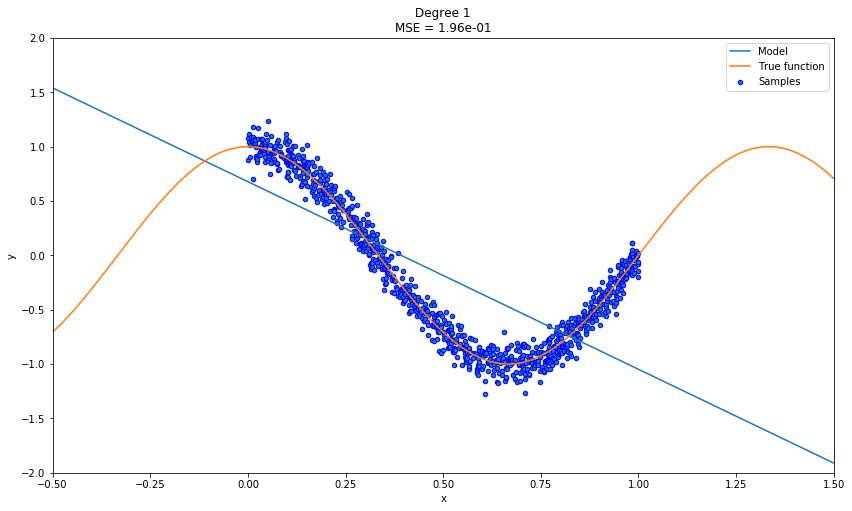

Coeffs: [-1.72567696]
Intercept: 0.6777494485287989


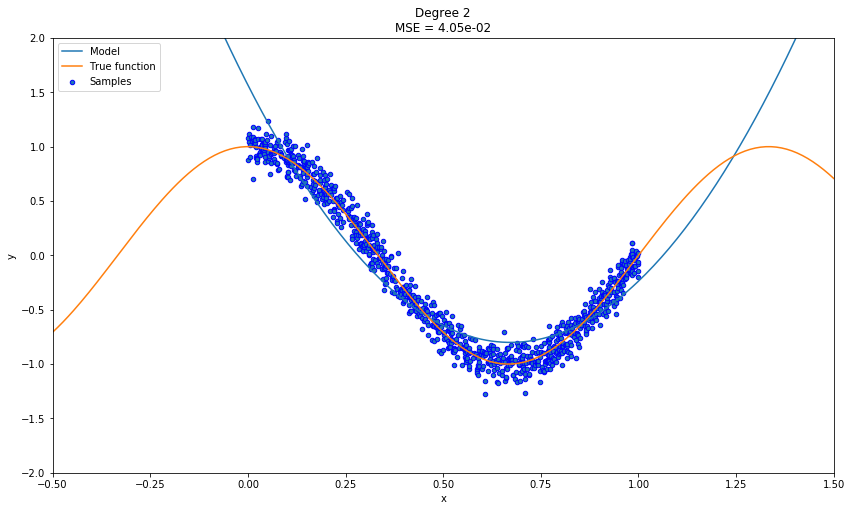

Coeffs: [-7.04503929  5.24069946]
Intercept: 1.5670612221377584


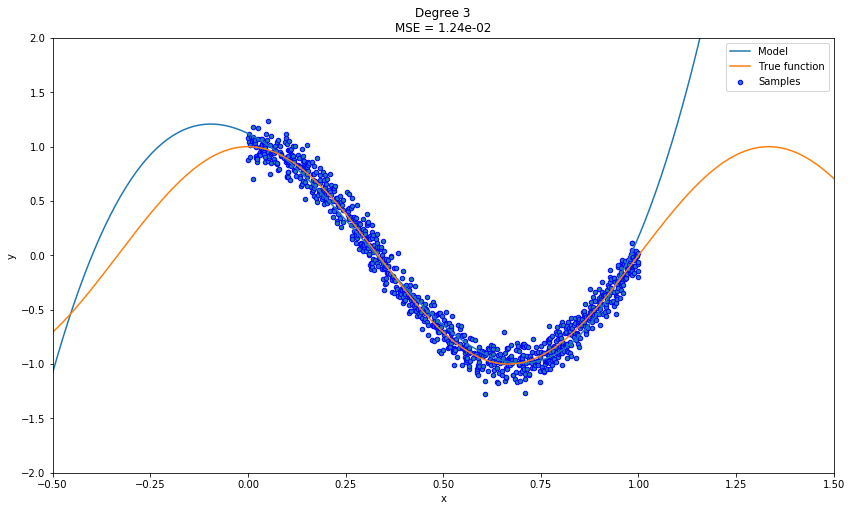

Coeffs: [-1.73902668 -7.9328121   8.71932474]
Intercept: 1.1216940784912215


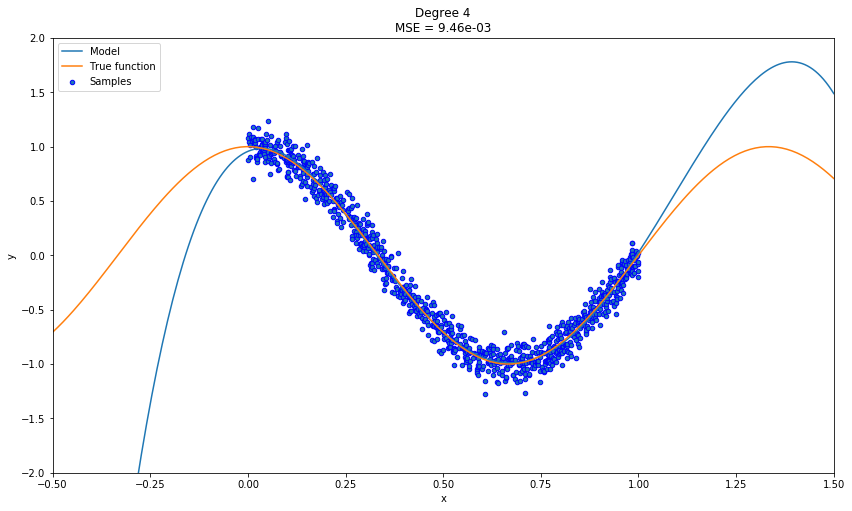

Coeffs: [  1.53276275 -22.53343322  31.21440823 -11.14389312]
Intercept: 0.9565172229398696


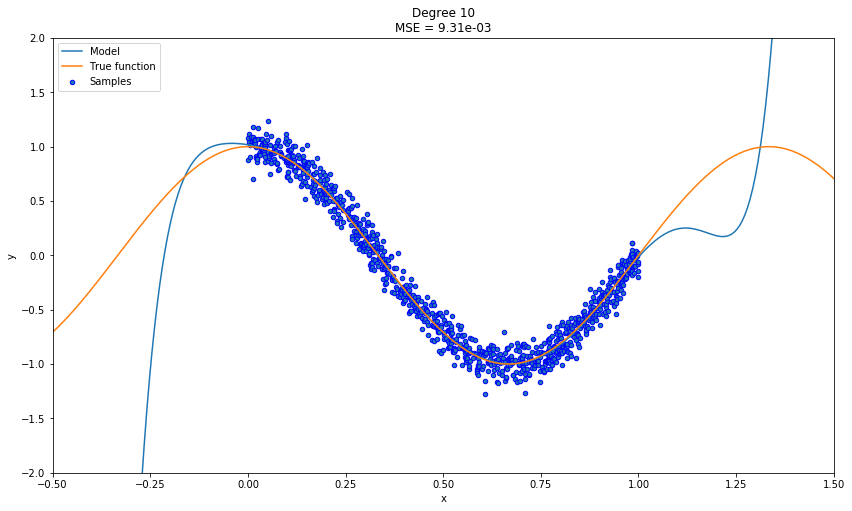

Coeffs: [-5.77569994e-01 -6.24669466e+00  1.99371814e+00 -1.45119208e+02
  7.48897983e+02 -1.56190384e+03  1.70105013e+03 -9.81781280e+02
  2.61149736e+02 -1.84954451e+01]
Intercept: 1.0177636384694926


In [65]:
# Import a bunch of stuff

import numpy as np
import matplotlib.pyplot as plt

# BEWARE: no sklearn in homework!
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# The true "target function"
def true_fun(X):
    # linear
    #return (X * 1.2 - 0.8)
    # quadratic
    #return (X ** 3 - 0.3 * X + .2)
    return np.cos(1.5 * np.pi * X)

#np.random.seed(0)

n_samples = 1000
degrees = [1, 2, 3, 4, 10]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

for i in range(len(degrees)):
    #ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

#     # Evaluate the models using crossvalidation
#     scores = cross_val_score(pipeline, X[:, np.newaxis], y,
#                              scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(-.5, 1.5, 300)
    y_true = true_fun(X_test)
    y_hat = pipeline.predict(X_test[:, np.newaxis])
    MSE = ((pipeline.predict(X[:, np.newaxis]) - y) ** 2).mean()

    plt.figure(figsize=(14, 8))
    plt.plot(X_test, y_hat, label="Model")
    plt.plot(X_test, y_true, label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-.5, 1.5))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
#     plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#         degrees[i], -scores.mean(), scores.std()))
    plt.title("Degree {}\nMSE = {:.2e}".format(degrees[i], MSE))
    plt.show()
    
    print("Coeffs: {}\nIntercept: {}".format(str(pipeline.steps[1][1].coef_), str(pipeline.steps[1][1].intercept_)))

In [40]:
pipeline.steps[1][1].intercept_

0.6802854930985076